In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Workaround to fix chrome issue where folium won't plot maps with a large number of layers
# See comment by dstein64 at: https://github.com/python-visualization/folium/issues/812

import base64
def _repr_html_(self, **kwargs):
    html = base64.b64encode(self.render(**kwargs).encode('utf8')).decode('utf8')
    onload = (
        'this.contentDocument.open();'
        'this.contentDocument.write(atob(this.getAttribute(\'data-html\')));'
        'this.contentDocument.close();'
    )
    if self.height is None:
        iframe = (
            '<div style="width:{width};">'
            '<div style="position:relative;width:100%;height:0;padding-bottom:{ratio};">'
            '<iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;'
            'border:none !important;" '
            'data-html={html} onload="{onload}" '
            'allowfullscreen webkitallowfullscreen mozallowfullscreen>'
            '</iframe>'
            '</div></div>').format
        iframe = iframe(html=html, onload=onload, width=self.width, ratio=self.ratio)
    else:
        iframe = ('<iframe src="about:blank" width="{width}" height="{height}"'
                  'style="border:none !important;" '
                  'data-html={html} onload="{onload}" '
                  '"allowfullscreen" "webkitallowfullscreen" "mozallowfullscreen">'
                  '</iframe>').format
        iframe = iframe(html=html, onload=onload, width=self.width, height=self.height)
    return iframe

folium.branca.element.Figure._repr_html_ = _repr_html_


In [3]:
# place = "Liverpool, United Kingdom"
# place = "Glasgow, Scotland"
# graph = ox.graph_from_place(place, network_type='drive')
latlon = [55.8642,-4.2518]
dist = 1000
graph = ox.graph_from_point(latlon,distance=dist)

In [4]:
nodes, streets = ox.graph_to_gdfs(graph)
nodes.head()

y         x       osmid highway  ref  \
1172238357  55.861840 -4.244511  1172238357     NaN  NaN   
913641498   55.863833 -4.245371   913641498     NaN  NaN   
4356767776  55.861552 -4.238203  4356767776     NaN  NaN   
913641506   55.862675 -4.240864   913641506     NaN  NaN   
913641509   55.862147 -4.240754   913641509     NaN  NaN   

                             geometry  
1172238357  POINT (-4.24451 55.86184)  
913641498   POINT (-4.24537 55.86383)  
4356767776  POINT (-4.23820 55.86155)  
913641506   POINT (-4.24086 55.86267)  
913641509   POINT (-4.24075 55.86215)

In [5]:
streets.head()

u           v  key                   osmid        highway  oneway  \
0  1172238357  1172237810    0               101519078           path   False   
1  1172238357  1172238191    0  [101519057, 101519084]  [steps, path]   False   
2  1172238357  1172237591    0               101519078           path   False   
3   913641498  6970176558    0                77663265     pedestrian   False   
4   913641498  6970176545    0   [77663265, 744750267]     pedestrian   False   

   length                                           geometry name maxspeed  \
0   8.502  LINESTRING (-4.24451 55.86184, -4.24464 55.86186)  NaN      NaN   
1  30.789  LINESTRING (-4.24451 55.86184, -4.24452 55.861...  NaN      NaN   
2  14.163  LINESTRING (-4.24451 55.86184, -4.24443 55.861...  NaN      NaN   
3   8.290  LINESTRING (-4.24537 55.86383, -4.24533 55.86376)  NaN      NaN   
4  17.817  LINESTRING (-4.24537 55.86383, -4.24541 55.863...  NaN      NaN   

  lanes  ref bridge access service tunnel width est_width  
0   NaN  NaN    NaN    NaN     NaN    NaN   NaN       NaN  
1   NaN  NaN    NaN    NaN     NaN    NaN   NaN       NaN  
2   NaN  NaN    NaN    NaN     NaN    NaN   NaN       NaN  
3   NaN  NaN    NaN    NaN     NaN    NaN   NaN       NaN  
4   NaN  NaN    NaN    NaN     NaN    NaN   NaN       NaN

In [6]:
street_types = pd.DataFrame(streets["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]


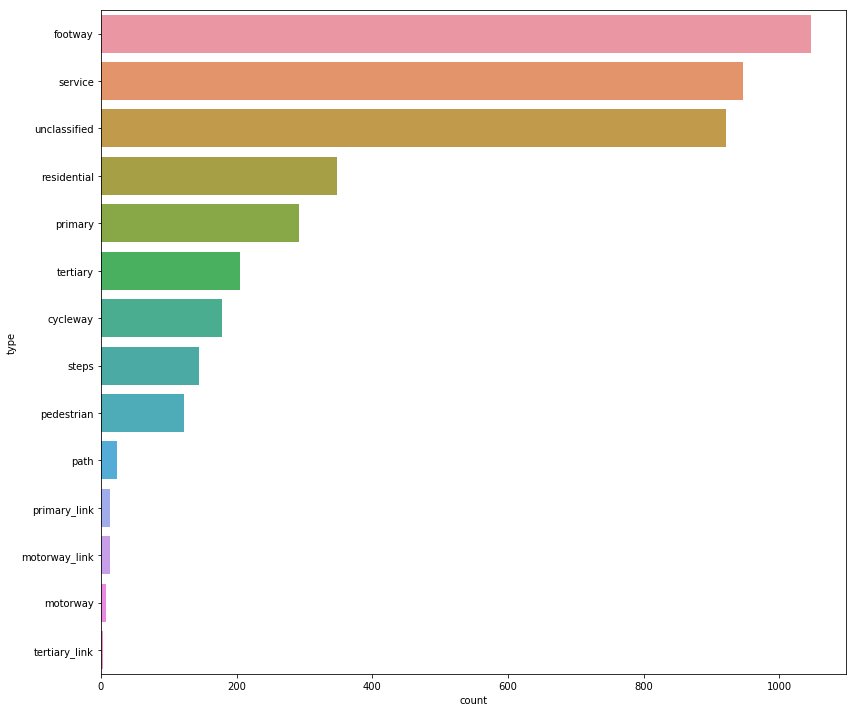

In [7]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
plt.savefig("barchart.png")

In [8]:
style = {'color': '#F7DC6F', 'weight':'1'}
m = folium.Map(latlon,
               zoom_start=15,
               tiles="CartoDb dark_matter")
folium.GeoJson(streets, style_function=lambda x: style).add_to(m)
m.save("streets.html")
m

In [9]:
buildings = ox.footprints_from_point(latlon,distance=dist)

In [18]:
buildings.head()

nodes       building  \
5299237   [37583056, 440283306, 440283309, 3842377994, 3...            yes   
20449298  [218374138, 218374139, 218374144, 218374147, 2...            yes   
22925660  [6894093619, 6894117849, 1647323613, 689409359...  train_station   
26410441  [289353525, 289353533, 3922933238, 3922933239,...            yes   
31845298  [356515825, 356515827, 356515828, 356515829, 3...            yes   

                              name  shop  wikidata  \
5299237   St Enoch Shopping Centre  mall  Q7587883   
20449298              Moxy Glasgow   NaN       NaN   
22925660           Glasgow Central   NaN   Q800825   
26410441            Jamaica Street   NaN       NaN   
31845298                 Beresford   NaN  Q4891304   

                           wikipedia  \
5299237          en:St. Enoch Centre   
20449298                         NaN   
22925660  en:Glasgow Central station   
26410441                         NaN   
31845298                         NaN   

                                                   geometry addr:city  \
5299237   POLYGON ((-4.25109 55.85617, -4.25223 55.85631...       NaN   
20449298  POLYGON ((-4.23984 55.85996, -4.23877 55.85958...   Glasgow   
22925660  POLYGON ((-4.25872 55.85665, -4.25921 55.85667...       NaN   
26410441  POLYGON ((-4.25681 55.85783, -4.25705 55.85723...       NaN   
31845298  POLYGON ((-4.26830 55.86645, -4.26842 55.86613...       NaN   

         addr:housenumber addr:postcode  ... network building:architecture  \
5299237               NaN           NaN  ...     NaN                   NaN   
20449298              210        G4 0QW  ...     NaN                   NaN   
22925660              NaN           NaN  ...     NaN                   NaN   
26410441              NaN           NaN  ...     NaN                   NaN   
31845298              NaN           NaN  ...     NaN                   NaN   

         elevation delivery fee:amount  ele food members name:gd type  
5299237        NaN      NaN        NaN  NaN  NaN     NaN     NaN  NaN  
20449298       NaN      NaN        NaN  NaN  NaN     NaN     NaN  NaN  
22925660       NaN      NaN        NaN  NaN  NaN     NaN     NaN  NaN  
26410441       NaN      NaN        NaN  NaN  NaN     NaN     NaN  NaN  
31845298       NaN      NaN        NaN  NaN  NaN     NaN     NaN  NaN  

[5 rows x 109 columns]

In [11]:
style_buildings = {'color':'#6C3483 ', 'fillColor': '#6C3483 ', 'weight':'1', 'fillOpacity' : 1}

m = folium.Map(latlon,
               zoom_start=15,

               tiles="Stamen Toner")

folium.GeoJson(buildings, style_function=lambda x: style_buildings).add_to(m)
m.save("buildings.html")
m

In [12]:
cafe = ox.pois_from_point(latlon,distance=dist, amenities=["cafe"])

In [13]:
cafe.head()

osmid                   geometry amenity        name  \
611389580    611389580  POINT (-4.24616 55.85967)    cafe   Tinderbox   
727456011    727456011  POINT (-4.25633 55.86658)    cafe  Cafe Royal   
1163254712  1163254712  POINT (-4.25472 55.86191)    cafe   Starbucks   
1311975904  1311975904  POINT (-4.25474 55.85768)    cafe       Costa   
1311976193  1311976193  POINT (-4.25353 55.86006)    cafe   Starbucks   

           element_type      brand brand:wikidata  brand:wikipedia  \
611389580          node        NaN            NaN              NaN   
727456011          node        NaN            NaN              NaN   
1163254712         node  Starbucks         Q37158     en:Starbucks   
1311975904         node      Costa        Q608845  en:Costa Coffee   
1311976193         node  Starbucks         Q37158     en:Starbucks   

                cuisine     official_name  ... drive_through email landuse  \
611389580           NaN               NaN  ...           NaN   NaN     NaN   
727456011           NaN               NaN  ...           NaN   NaN     NaN   
1163254712  coffee_shop  Starbucks Coffee  ...           NaN   NaN     NaN   
1311975904  coffee_shop               NaN  ...           NaN   NaN     NaN   
1311976193  coffee_shop  Starbucks Coffee  ...           NaN   NaN     NaN   

           payment:cash payment:credit_cards payment:debit_cards  \
611389580           NaN                  NaN                 NaN   
727456011           NaN                  NaN                 NaN   
1163254712          NaN                  NaN                 NaN   
1311975904          NaN                  NaN                 NaN   
1311976193          NaN                  NaN                 NaN   

           payment:mastercard payment:visa start_date tourism  
611389580                 NaN          NaN        NaN     NaN  
727456011                 NaN          NaN        NaN     NaN  
1163254712                NaN          NaN        NaN     NaN  
1311975904                NaN          NaN        NaN     NaN  
1311976193                NaN          NaN        NaN     NaN  

[5 rows x 52 columns]

In [14]:
cafe_points = cafe[cafe.geom_type == "Point"]

In [16]:
m = folium.Map(latlon, zoom_start=15, tiles="CartoDb dark_matter")
locs = zip(cafe_points.geometry.y, cafe_points.geometry.x)
#folium.GeoJson(buildings, style_function=lambda x: style_buildings).add_to(m)
for location in locs:
    folium.CircleMarker(location=location, 
        color = "#F4F6F7",   radius=1).add_to(m)
m.save("cafes.html")
m